# The Super Weight in Large Language Models

This notebook includes all data and plot-making code for figures found in the paper. See the repository root `README.md` for scripts that generate the data found here.

In [3]:
# %pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("outputs/figures", exist_ok=True)

def add_global_plot_styles(multiplier=1):
    plt.rcParams["font.family"] = "serif"
    plt.grid(color='#CCCCCC', linestyle='--')
    plt.rcParams.update({
        'axes.titlesize': 17 * multiplier,
        'axes.labelsize': 15 * multiplier,
        'xtick.labelsize': 10 * multiplier,
        'ytick.labelsize': 10 * multiplier,
    })
    plt.tight_layout()




## Figure 3

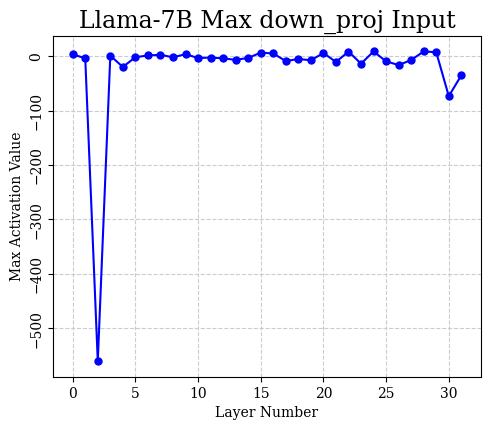

In [2]:
largest_activations_down_proj_input = [3.251953125, -3.791015625, -560.5, 0.8876953125, -19.84375, -1.876953125, 1.2734375, 2.515625, -2.1171875, 3.6484375, -3.41796875, -2.5546875, -3.955078125, -6.828125, -3.21875, 6.51171875, 4.92578125, -9.1015625, -5.10546875, -7.62109375, 5.81640625, -10.640625, 8.421875, -13.78125, 8.609375, -9.46875, -16.40625, -7.05859375, 8.6875, 7.26953125, -73.5, -35.21875]
n_activations = len(largest_activations_down_proj_input)

# Create the plot
plt.figure(figsize=(5,4))
add_global_plot_styles()

plt.plot(range(n_activations), largest_activations_down_proj_input, color='blue', marker='o', markersize=5)

plt.xlabel('Layer Number')
plt.ylabel('Max Activation Value')
plt.title('Llama-7B Max down_proj Input')

# Show the plot
plt.yticks(rotation=90, va='center')
plt.savefig("outputs/figures/in_down_proj.pdf", bbox_inches='tight')
plt.show()

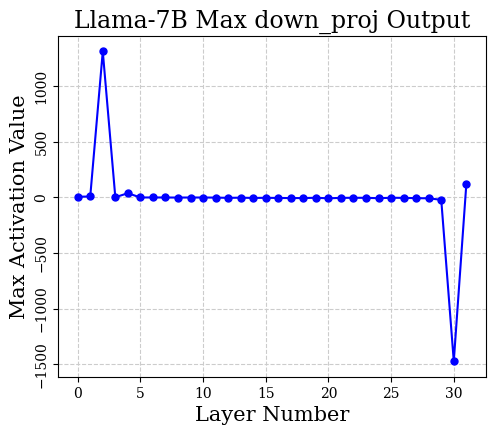

In [3]:
largest_activations_down_proj_output = [5.48046875, 8.203125, 1313.0, 1.3076171875, 37.59375, -0.88525390625, -0.77197265625, -1.009765625, -1.73046875, -1.12890625, -1.21875, -1.9169921875, -4.30859375, -2.658203125, -5.1328125, -3.794921875, -5.328125, -6.18359375, -6.140625, -3.451171875, -8.421875, -4.26953125, -3.6875, -3.9140625, -7.46484375, -3.375, -4.4375, -6.8359375, -8.328125, -21.78125, -1474.0, 116.5625]

n_activations = len(largest_activations_down_proj_output)

plt.figure(figsize=(5,4))
add_global_plot_styles()

plt.plot(range(n_activations), largest_activations_down_proj_output, color='blue', marker='o', markersize=5)

plt.xlabel('Layer Number')
plt.ylabel('Max Activation Value')
plt.title('Llama-7B Max down_proj Output')

# Show the plot
plt.yticks(rotation=90, va='center')
plt.savefig("outputs/figures/out_down_proj.pdf", bbox_inches='tight')
plt.show()

## Figure 4

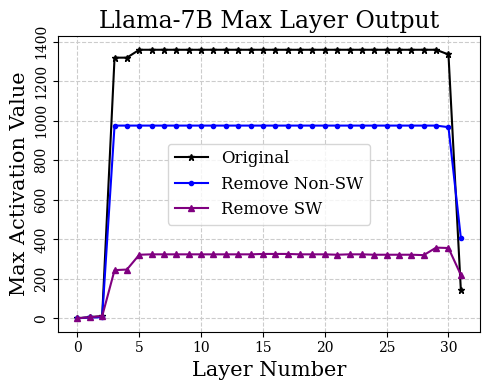

In [4]:
# Data
layers = list(range(32))
original = [0.18945313, 5.84375, 10.75, 1320, 1320, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1360, 1336, 145]
all_outliers_removed = [0.12890625, 3.859375, 7.9375, 108.5, 110.5, 122.5, 130, 133, 139, 147, 157, 164, 172, 178, 177, 174, 168, 160, 157, 148, 140, 129, 119.5, 105.5, 111.5, 107, 106, 104, 103.5, 103.5, 105.5, 98]
all_other_outliers_removed = [0.11425781, 4.21875, 5.28125, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 976, 968, 408]
super_weight_removed = [0.18945313, 5.84375, 10.75, 244, 247, 322, 324, 324, 324, 324, 324, 324, 324, 324, 324, 326, 326, 326, 324, 324, 324, 322, 324, 324, 322, 322, 322, 322, 320, 358, 356, 220]

# Create the plot
plt.figure(figsize=(5,4))
add_global_plot_styles()

plt.plot(layers, original, label='Original', color='black', marker='*', markersize=5)
# plt.plot(layers, all_outliers_removed, label='All outliers removed', marker='s')
plt.plot(layers, all_other_outliers_removed, label='Remove Non-SW', color='blue', marker='o', markersize=3)
plt.plot(layers, super_weight_removed, label='Remove SW', color='purple', marker='^', markersize=4)

plt.xlabel('Layer Number')
plt.ylabel('Max Activation Value')
plt.title('Llama-7B Max Layer Output')
plt.legend(prop={"size": 12})

# Show the plot
plt.yticks(rotation=90, va='center')
plt.tight_layout()
plt.savefig("outputs/figures/SA_magnitude_Llama7B.pdf", bbox_inches='tight')
plt.show()

## Figure 5

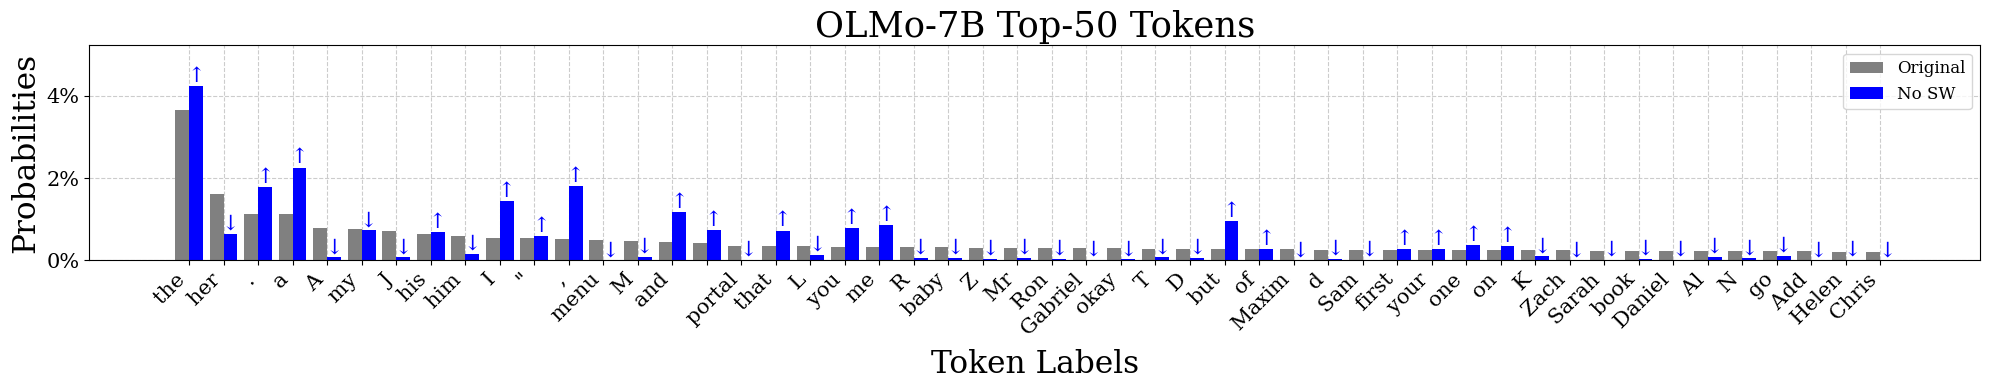

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def percentage_formatter(x, pos):
    """Format the tick labels as percentages."""
    return f'{x * 100:.0f}%'

def plot(model, title_1="Original", title_2="No SW", top=10):
    if model == "Llama-7B":
        top_tokens = ['the', 'her', 'J', 'a', '.', 'my', 'A', 'him', 'Sh', 'I', 'M', 'and', 'D', 'his', '"', 'Ch', 'L', 'b', ',', 'T', 'Z', 'Am', 'baby', 'He', 'w', 'Helen', 'but', 'menu', 'portal', 'R', 'you', 'Daniel', 'that', 'Mr', 'cl', 'Ron', 'Mar', 'B', 'Maxim', 's', 'Sam', 'one', 'S', 'H', 'K', 'Charles', 'ma', 'okay', 'Chris', 'V', 'of', 'd', 'N', 'to', 'Cole', 'go', 'me', 'Jen', 'Sarah', 'little', 'first', 'in', 'Gabriel', 'E', 'p', 'Car', 'Co', 'C', 'lo', 'Max', 'Leg', 'your', 'ship', 'Zach', 'kiss', 'po', 'Dragon', 'on', 'Carlos', 'Add', 'bra', 'phone', 'city', 'st', 'letter', 'W', 'h', 'emer', 'vain', 'Leo', 'so', 'Council', 'Bul', 'Josh', 'journal', 'Mare', 'Kate', 'rough', 'dream', 'Vo']
        top_probs_1 = [0.0349, 0.0144, 0.0124, 0.0112, 0.0110, 0.0096, 0.0077, 0.0074, 0.0065,
    0.0063, 0.0056, 0.0055, 0.0055, 0.0053, 0.0052, 0.0052, 0.0051, 0.0049,
    0.0048, 0.0043, 0.0042, 0.0038, 0.0038, 0.0038, 0.0037, 0.0035, 0.0035,
    0.0035, 0.0035, 0.0033, 0.0033, 0.0031, 0.0031, 0.0030, 0.0030, 0.0030,
    0.0029, 0.0029, 0.0029, 0.0029, 0.0028, 0.0028, 0.0027, 0.0027, 0.0027,
    0.0027, 0.0026, 0.0026, 0.0026, 0.0026, 0.0025, 0.0025, 0.0025, 0.0025,
    0.0025, 0.0024, 0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0022,
    0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022,
    0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0020, 0.0020, 0.0020,
    0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0020,
    0.0020, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019,
    0.0019]
        top_probs_2 = [0.07393327355384827, 0.005796107463538647, 0.0005026604630984366, 0.01978859305381775, 0.05370398238301277, 0.005108043551445007, 0.000989335821941495, 0.0014335322193801403, 0.0006108510424382985, 0.01489196065813303, 0.0007982737151905894, 0.03353939205408096, 0.0006942553445696831, 0.0018650108249858022, 0.0010330749209970236, 0.0009258400532416999, 0.0008142212172970176, 0.002697666874155402, 0.050533510744571686, 0.0009868264896795154, 7.5386771641206e-05, 6.313761696219444e-05, 0.000558457977604121, 0.0003388542972970754, 0.002569432370364666, 5.8283229009248316e-05, 0.005419852212071419, 7.936104339023586e-06, 5.822079401696101e-06, 0.0008412479073740542, 0.007096120156347752, 7.90477315604221e-06, 0.005804805085062981, 0.0001021589050651528, 0.00035695370752364397, 0.000176447065314278, 0.0018587132217362523, 0.0007289925124496222, 5.980596142762806e-07, 0.0009775302605703473, 4.743638419313356e-05, 0.005614736117422581, 0.0009152729180641472, 0.0006226736004464328, 0.0006849359488114715, 9.919107469613664e-06, 8.577967673772946e-05, 0.00023769405379425734, 4.209581311442889e-05, 0.0003213033778592944, 0.007881862111389637, 0.0007605588180013001, 0.000515169114805758, 0.009099193848669529, 2.3108164896257222e-05, 0.0016146801644936204, 0.003832565387710929, 0.000137022027047351, 0.0006076743011362851, 0.0012568377424031496, 0.0022118554916232824, 0.006275583989918232, 1.765838169376366e-05, 0.0005323743680492043, 0.0006236275075934827, 0.00023809399863239378, 4.747822094941512e-05, 0.0012172211427241564, 0.0001553848123876378, 2.4652714273543097e-05, 8.41994824440917e-06, 0.005159015767276287, 0.0005745483213104308, 1.148763476521708e-05, 2.5700399419292808e-05, 0.00032945326529443264, 0.00021474811364896595, 0.0023762097116559744, 8.499881914758589e-06, 1.0520162504690234e-05, 9.823901200434193e-05, 0.00015510992670897394, 0.0007344699697569013, 0.001245444524101913, 0.0004960838123224676, 0.0013477315660566092, 0.001803624676540494, 2.284512265759986e-05, 8.291286212624982e-05, 1.0017764907388482e-05, 0.002730047795921564, 7.409164390992373e-05, 8.970236194727477e-06, 7.964805990923196e-05, 1.1240354069741443e-05, 6.30096019449411e-06, 0.0002542755100876093, 9.737688742461614e-06, 9.071223757928237e-05, 6.36175991530763e-06]

        top_tokens = top_tokens[:top]
        top_probs_1 = top_probs_1[:top]
        top_probs_2 = top_probs_2[:top]

        if top >= 25:
            fig, ax = plt.subplots(figsize=(20,4))
            plt.xticks(rotation=45, ha="right")
        else:
            fig, ax = plt.subplots(figsize=(5,4))
    elif model == "OLMo-7B":
        if top >= 25:
            fig, ax = plt.subplots(figsize=(20,4))
            plt.xticks(rotation=45, ha="right")
        else:
            fig, ax = plt.subplots(figsize=(5,4))
        top_tokens = [' the', ' her', '.', ' a', ' A', ' my', ' J', ' his', ' him', ' I', ' "', ',', ' menu', ' M', ' and', '\n', ' portal', ' that', ' L', ' you', ' me', ' R', ' baby', ' Z', ' Mr', ' Ron', ' Gabriel', ' okay', ' T', ' D', ' but', ' of', ' Maxim', ' d', ' Sam', ' first', ' your', ' one', ' on', ' K', ' Zach', ' Sarah', ' book', ' Daniel', ' Al', ' N', ' go', ' Add', ' Helen', ' Chris', ' Dragon', ' Duke', ' Cole', ' C', ' Charles', ' locker', ' phone', ' so', ' too', ' Amber', ' Luc', ' Miss', ' river', ' Carlos', ' in', ' letter', ' Heights', ' vain', ' it', ' Jake', ' Council', ' ball', ' city', ' Josh', ' Glad', ' Max', ' again', ' them', ' Sav', ' cow', ' Shirley', ' nov', ' ship', ' At', ' bake', ' Vik', ' Hannah', ' j', ' Car', ' brace', ' St', ' chim', ' Diana', ' Bul', ' Mall', ' driving', ' Ethan', ' kiss', ' Y', ' curse']
        top_probs_1 = [0.03664327412843704, 0.016014093533158302, 0.01130229514092207, 0.011166413314640522, 0.007860707119107246, 0.007506812456995249, 0.007257354911416769, 0.006318783387541771, 0.005884020123630762, 0.005487130954861641, 0.005391174461692572, 0.005104259587824345, 0.004928735084831715, 0.004596450831741095, 0.004448019899427891, 0.004217979498207569, 0.003589586354792118, 0.003488576738163829, 0.0034182113595306873, 0.0033053236547857523, 0.0033018479589372873, 0.0032313663978129625, 0.003167711431160569, 0.0030984655022621155, 0.0030897478573024273, 0.003055550390854478, 0.0030076035764068365, 0.002884567016735673, 0.0028676893562078476, 0.0028511006385087967, 0.00282941828481853, 0.0026884598191827536, 0.0026577701792120934, 0.0026349504478275776, 0.0025640332605689764, 0.00254319841042161, 0.002540518995374441, 0.002499572467058897, 0.0024394846986979246, 0.002429342595860362, 0.0024281891528517008, 0.0023631255608052015, 0.0022974980529397726, 0.002273860154673457, 0.0022432550322264433, 0.002240025205537677, 0.0022279080003499985, 0.0022138541098684072, 0.0021515609696507454, 0.002148906933143735, 0.0021275195758789778, 0.0021195856388658285, 0.002067997120320797, 0.002066227840259671, 0.0020598568953573704, 0.002054667565971613, 0.002036449033766985, 0.0020281311590224504, 0.0020250838715583086, 0.002021430991590023, 0.0020211231894791126, 0.0020110199693590403, 0.0019991579465568066, 0.001995012629777193, 0.0019830388482660055, 0.001980441389605403, 0.0019778457935899496, 0.001975564518943429, 0.001971743069589138, 0.0019629662856459618, 0.001954992301762104, 0.001945034135133028, 0.0019408822990953922, 0.0019375182455405593, 0.001932069193571806, 0.0019263470312580466, 0.0019221869297325611, 0.0019189987797290087, 0.0019187884172424674, 0.0019154066685587168, 0.0019080862402915955, 0.0019077019533142447, 0.001899699680507183, 0.0018839429831132293, 0.0018767869332805276, 0.0018702464876696467, 0.0018673079321160913, 0.0018665227107703686, 0.0018646459793671966, 0.0018522152677178383, 0.001851129112765193, 0.001849753549322486, 0.0018492640228942037, 0.001838903990574181, 0.001825874438509345, 0.0018196154851466417, 0.0018119479063898325, 0.0018064652103930712, 0.0018064194591715932, 0.0018030498176813126]
        top_probs_2 = [0.04227922111749649, 0.00639238441362977, 0.017731452360749245, 0.022554537281394005, 0.0007683814037591219, 0.007320762146264315, 0.0007570540765300393, 0.006794407963752747, 0.0016261052805930376, 0.014468773268163204, 0.005846050567924976, 0.018130797892808914, 2.7525278710527346e-05, 0.0009258313803002238, 0.011758974753320217, 0.007453392259776592, 5.226553184911609e-05, 0.007246240507811308, 0.0014196629635989666, 0.007953730411827564, 0.008608562871813774, 0.0005585301551036537, 0.0006778201786801219, 0.00029415488825179636, 0.0005715279839932919, 0.00043553594150580466, 8.650520612718537e-05, 0.0002763188967946917, 0.0007384505006484687, 0.0005902149132452905, 0.009660729207098484, 0.0027056008111685514, 3.774768629227765e-06, 0.0003627160913310945, 0.00016669800970703363, 0.002677253680303693, 0.002703540027141571, 0.003615772584453225, 0.0034485298674553633, 0.0009913778631016612, 2.6566345695755444e-05, 8.302557398565114e-05, 0.0003020190924871713, 4.6305831347126514e-05, 0.0007792788092046976, 0.0004545865813270211, 0.0010252491338178515, 3.746327638509683e-05, 0.00012579798931255937, 2.611937998153735e-05, 1.5665931641706266e-05, 2.9058031941531226e-05, 8.522201824234799e-05, 0.000464835437014699, 8.532493666280061e-05, 6.145956831460353e-06, 0.0009992507984861732, 0.004136280156672001, 0.001319544855505228, 0.0001290735526708886, 5.103296280140057e-05, 0.00015835388330742717, 0.0008150970679707825, 2.752816908468958e-05, 0.00922393798828125, 0.00015086226630955935, 1.4033591924089706e-06, 9.796907761483453e-06, 0.008482557721436024, 7.576409552711993e-05, 0.0005380434449762106, 8.084613364189863e-05, 0.0012333276681602001, 2.0263765691197477e-05, 0.0001615485525690019, 0.00040425360202789307, 0.0006120405159890652, 0.0011147563345730305, 6.270645826589316e-05, 0.00010242129792459309, 7.077925602061441e-06, 0.00014957389794290066, 0.00020538116223178804, 6.939514423720539e-05, 0.000887800648342818, 0.00034457273432053626, 2.007561852224171e-05, 0.000567879993468523, 9.545521606924012e-05, 2.942695573437959e-05, 0.00033899411209858954, 2.256996594951488e-05, 4.063005690113641e-05, 1.8139908206649125e-05, 7.804695087543223e-06, 6.590315024368465e-05, 1.7635496988077648e-05, 6.193140870891511e-05, 0.00045300243073143065, 9.940049494616687e-05]
        top_tokens = top_tokens[:top]
        top_probs_1 = top_probs_1[:top]
        top_probs_2 = top_probs_2[:top]
    elif model == "Mistral-7B":
        if top >= 25:
            fig, ax = plt.subplots(figsize=(20,4))
            plt.xticks(rotation=45, ha="right")
        else:
            fig, ax = plt.subplots(figsize=(5,4))
        top_tokens = ['the', 'her', 'a', '.', 'J', 'A', 'my', 'him', 'T', '"', 'his', 'and', 'Max', 'M', 'I', 'menu', ',', 'R', 'N', 'Z', 'D', 'C', 'Sh', 'Charles', 'L', 'but', 'portal', 'you', 'E', 'd', 'H', 'Sarah', 'Ron', 'that', 'Gabriel', 'Sam', 'Peg', 'b', 'K', 'Helen', 'okay', 'Daniel', 'one', 'Che', 'Carlos', 'your', 'baby', 'B', 'of', 'cl', 's', 'He', 'me', 'Add', 'Ad', 'Cole', 'At', 'first', 'dragon', 'Ch', 'dream', 'Mr', 'm', 'De', 'brace', 'Al', 'book', 'Dragon', 'Mum', 'W', '."', 'Alice', 'nov', 'Josh', 'Kate', 'kiss', 'city', 'vain', 'Leg', 'Shir', 'letter', 'nice', 'Car', 'phone', 'ship', 'on', 'lock', 'Council', 'Leo', 'Mar', 'chim', 'G', 'Sav', '’', 'Jake', 'Bul', 'Hannah', 'j', 'fro', 'again']
        top_probs_1 = [0.03112000972032547, 0.018006261438131332, 0.010833143256604671, 0.009966968558728695, 0.00979513768106699, 0.009284773841500282, 0.008274626918137074, 0.007504770997911692, 0.0063729360699653625, 0.005631198640912771, 0.0055817486718297005, 0.005292024463415146, 0.005121411290019751, 0.004811211489140987, 0.004807046614587307, 0.004806061275303364, 0.004775824956595898, 0.0041776783764362335, 0.004167317412793636, 0.004148945212364197, 0.003947763238102198, 0.003786938963457942, 0.003612291067838669, 0.0035617798566818237, 0.0035612406209111214, 0.0034201275557279587, 0.003271989058703184, 0.0032711573876440525, 0.00319971377030015, 0.0031638690270483494, 0.0031350681092590094, 0.0030983539763838053, 0.0030460176058113575, 0.0028611416928470135, 0.0028583707753568888, 0.0028446302749216557, 0.0028145627584308386, 0.0027675132732838392, 0.002752758329734206, 0.0027313190512359142, 0.002704640617594123, 0.002690252149477601, 0.0026815899182111025, 0.00266936793923378, 0.002641857136040926, 0.0026253541000187397, 0.0026178613770753145, 0.0026129446923732758, 0.0026112881023436785, 0.002572560915723443, 0.00256224162876606, 0.0025450040120631456, 0.0025272879283875227, 0.0024738458450883627, 0.0024620157200843096, 0.0024214850272983313, 0.0024044965393841267, 0.0023901057429611683, 0.0023893944453448057, 0.002366084838286042, 0.002281970577314496, 0.002271779114380479, 0.002232525497674942, 0.0022180413361638784, 0.0021587908267974854, 0.002151402411982417, 0.002113660331815481, 0.002102496102452278, 0.0020724921487271786, 0.002065878128632903, 0.002062138170003891, 0.002034870907664299, 0.0019991479348391294, 0.001996187726035714, 0.0019905136432498693, 0.0019896766170859337, 0.0019885420333594084, 0.0019878093153238297, 0.001986345276236534, 0.0019761561416089535, 0.0019736008252948523, 0.001966367242857814, 0.0019625115673989058, 0.0019566945265978575, 0.0019521925132721663, 0.0019504630472511053, 0.0019471592968329787, 0.0019441019976511598, 0.0019279051339253783, 0.0019251923076808453, 0.0019232401391491294, 0.0019169965526089072, 0.0019136674236506224, 0.001903016702271998, 0.0018977879080921412, 0.0018917288398370147, 0.0018917227862402797, 0.0018715901533141732, 0.001863130833953619, 0.001856151851825416]
        top_probs_2 = [0.0018717391649261117, 0.0002241476031485945, 0.0018944009207189083, 0.015274256467819214, 0.0001727866765577346, 0.0009493003599345684, 0.00022909659310244024, 0.00015926864580251276, 0.0002994631358888, 0.00020815229800064117, 0.00019899495237041265, 0.0059699248522520065, 5.001982572139241e-05, 0.00039735023165121675, 0.0006475523114204407, 2.2282545614871196e-05, 0.014983379282057285, 0.0006215149769559503, 0.0004230569757055491, 0.0009975038701668382, 0.0006066360510885715, 0.0005176226841285825, 0.000147807237226516, 0.00014028848090674728, 0.00044193866779096425, 0.0003875012043863535, 4.940417056786828e-06, 0.0028112984728068113, 0.0002801626978907734, 0.0009111014078371227, 0.001247917884029448, 3.0355091439560056e-05, 5.983316441415809e-05, 0.001693998696282506, 1.4413645658351015e-05, 7.806383655406535e-05, 1.683434129517991e-05, 0.0011211761739104986, 0.00022557415650226176, 3.7504352803807706e-05, 3.337641464895569e-05, 0.00032583859865553677, 0.0018084632465615869, 5.581730147241615e-05, 3.4355285606579855e-05, 0.0005484705325216055, 1.298870483879e-05, 0.000386942207114771, 0.0019865036010742188, 0.00010611596371745691, 0.0002917035308200866, 0.00022364759934134781, 0.00019769508799072355, 3.1557534384774044e-05, 8.204597543226555e-05, 7.731401638011448e-06, 0.00032894263858906925, 9.146503725787625e-05, 1.0698307960410602e-05, 0.0003334242501296103, 9.476050763623789e-05, 9.214742021868005e-05, 0.0003966453077737242, 0.00011024945706594735, 1.134859849116765e-05, 0.0003153983852826059, 3.947280492866412e-05, 1.889710438263137e-05, 1.0212399502051994e-05, 0.001700171735137701, 0.0002498650283087045, 1.6794167095213197e-05, 4.4787309889215976e-05, 1.673908809607383e-05, 1.673906263022218e-05, 4.739739961223677e-05, 7.381398609140888e-05, 1.794679519662168e-05, 6.651267176494002e-05, 3.2663290767231956e-05, 2.1243611627141945e-05, 4.381198959890753e-05, 3.9293692680075765e-05, 8.363233791897073e-05, 3.5660661524161696e-05, 0.0006546033546328545, 6.748863961547613e-05, 2.8200418455526233e-05, 0.00020705889619421214, 4.368987720226869e-05, 1.2174627954664174e-05, 0.00032183597795665264, 3.9665184885961935e-05, 0.0010591684840619564, 3.074591950280592e-05, 5.151050118001876e-06, 2.0336481611593626e-05, 0.0001270686771022156, 1.4244287740439177e-05, 0.00034531150595285]

    multiplier = 1.5 if top >= 25 else 1
    add_global_plot_styles(multiplier)
    
    width = 0.4  # Width of the bars
    x = range(len(top_tokens))  # X locations for the groups
    
    bars1 = ax.bar([i - width/2 for i in x], top_probs_1, width, label=title_1, color='gray', zorder=2)
    bars2 = ax.bar([i + width/2 for i in x], top_probs_2, width, label=title_2, color='blue', zorder=2)
    
    # Adding arrows to indicate increase or decrease
    for i in range(len(top_tokens)):
        if top_probs_1[i] < top_probs_2[i]:
            ax.annotate('↑', xy=(i + width/2, top_probs_2[i] + 0.001), fontsize=15, color='blue', ha='center')
        elif top_probs_1[i] > top_probs_2[i]:
            ax.annotate('↓', xy=(i + width/2, top_probs_2[i] + 0.001), fontsize=15, color='blue', ha='center')

    # Labeling
    ax.set_xlabel('Token Labels')
    ax.set_ylabel('Probabilities')
    ax.set_title(f"{model} Top-{top} Tokens")
    ax.set_xticks(x)
    ax.set_xticklabels(top_tokens)
    ax.legend(prop={"size": 12})

    # format y ticks with %
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    
    # add top padding so enough room to show arrow
    ax.set_ylim(0, max(max(top_probs_1), max(top_probs_2)) + 0.01)  # Add 0.1 or another value for padding

    plt.tight_layout()
    plt.savefig(f'outputs/figures/token_probs_top{top}_{model}.pdf', bbox_inches='tight')
    plt.show()

# plot("Llama-7B")
# plot("OLMo-7B")
# plot("Mistral-7B")
# plot("Llama-7B", top=50)
plot("OLMo-7B", top=50)

# if you see the wrong size font, just plot it again


## Figure 6

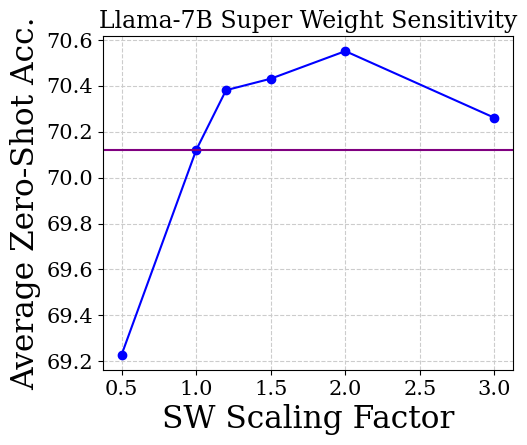

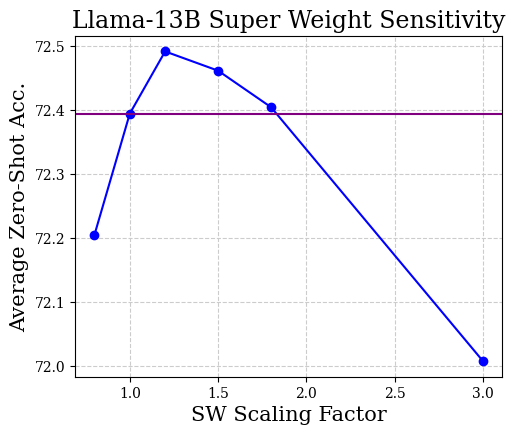

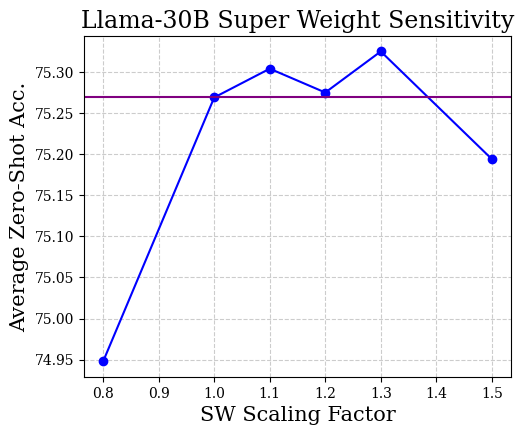

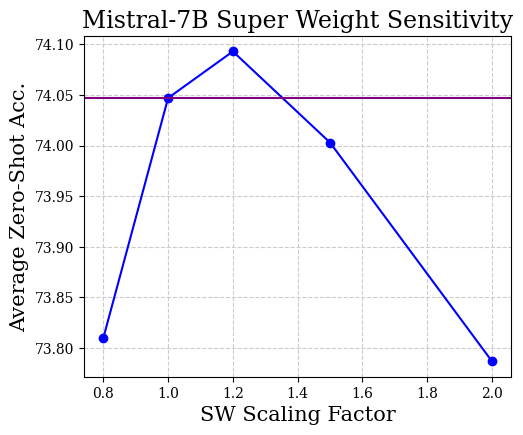

In [6]:
import matplotlib.pyplot as plt

def plot(model, indices):
    if model == "Llama-7B":
        scaling_factor = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.2, 1.5, 2, 3]
        AVG = [35.15, 50.24, 64.21, 67.59, 68.86, 69.23, 70.12, 70.38, 70.43, 70.55, 70.26]
        OG = 70.12
    elif model == "Llama-13B":
        scaling_factor = [0, 0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 1.8, 3]
        AVG = [0.29573, 0.46101, 0.61259, 0.71224, 0.72205, 0.72394, 0.72491, 0.72461, 0.72404, 0.72008]
        AVG = [x * 100 for x in AVG]
        # OG = 72.85
        OG = 72.394
    elif model == "Llama-30B":
        scaling_factor = [0, 0.5, 0.8, 1, 1.1, 1.2, 1.3, 1.5, 2, 3]
        AVG = [0.31649, 0.74274, 0.74948, 0.75269, 0.75304, 0.75275, 0.75325, 0.75194, 0.7514, 0.74861]
        AVG = [x * 100 for x in AVG]
        # OG = 75.35
        OG = 75.269
    elif model == "Mistral-7B":
        scaling_factor = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 1.2, 1.5, 2]
        AVG = [0.31027, 0.38334, 0.48343, 0.68572, 0.72931, 0.7381, 0.74047, 0.74093, 0.74003, 0.73787]
        AVG = [x * 100 for x in AVG]
        OG = 74.047
    
    
    # Create the plot
    plt.figure(figsize=(5,4))
    add_global_plot_styles()

    plt.plot(scaling_factor[indices], AVG[indices], marker='o', linestyle='-', color='b')
    plt.axhline(y = OG, color = 'purple', linestyle = '-') 
    
    plt.title(f'{model} Super Weight Sensitivity')
    plt.xlabel('SW Scaling Factor')
    plt.ylabel('Average Zero-Shot Acc.')
    
    # Show the plot
    suffix = '_full' if (indices.stop is None and indices.start is None) else ''
    plt.savefig(f'outputs/figures/sw_scaling_{model}{suffix}.pdf', bbox_inches='tight')
    plt.show()

plot("Llama-7B", slice(5, None))
plot("Llama-13B", slice(4, None))
plot("Llama-30B", slice(2, -2))
plot("Mistral-7B", slice(5, None))
# plot("Llama-7B", offset=0)
# plot("Llama-13B", offset=0)
# plot("Llama-30B", offset=0)
# plot("Mistral-7B", offset=0)

## Figure 7

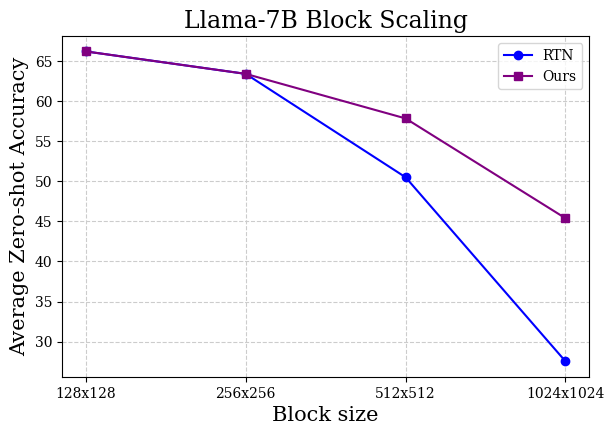

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
blocksize = ['128x128', '256x256', '512x512', '1024x1024',]
result_RTN = [66.21, 63.41, 50.51, 27.55]
result_Ours = [66.21, 63.41, 57.85, 45.40]

# Create the plot
plt.figure(figsize=(6,4))
add_global_plot_styles()

plt.plot(blocksize, result_RTN, label='RTN', marker='o', color='blue')
plt.plot(blocksize, result_Ours, label='Ours', marker='s', color='purple')

plt.title('Llama-7B Block Scaling')
plt.xlabel('Block size')
plt.ylabel('Average Zero-shot Accuracy')
plt.legend()
plt.grid(color='#CCCCCC', linestyle='--')
plt.savefig("outputs/figures/blocksize_curve_llama7b.pdf")
plt.show()

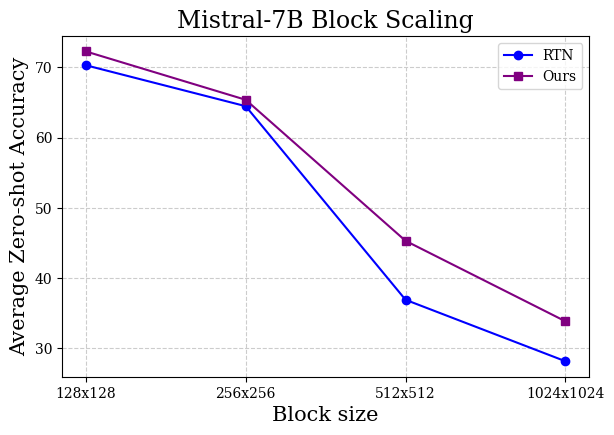

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
blocksize = ['128x128', '256x256', '512x512', '1024x1024',]
result_RTN = [70.29, 64.46, 36.88, 28.13]
result_Ours = [72.26, 65.37, 45.28, 33.82]

# Create the plot
plt.figure(figsize=(6,4))
add_global_plot_styles()

plt.plot(blocksize, result_RTN, label='RTN', marker='o', color='blue')
plt.plot(blocksize, result_Ours, label='Ours', marker='s', color='purple')

plt.title('Mistral-7B Block Scaling')
plt.xlabel('Block size')
plt.ylabel('Average Zero-shot Accuracy')
plt.legend()
plt.savefig("outputs/figures/blocksize_curve_mistral7b.pdf")
plt.show()